Sophia Ladyzhets, sal2213

Partner: Sally Green

## Temperature Modeling

### Objective:

Estimate difference in peak daily temperature between various weather stations in NYC and temperature readings in Central Park over a 6-8 month period. 

In [139]:
import requests
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt, dates as mdates
import datetime as datetime


In [140]:
%run WeatherData_Fxns_SAL.py

## Load data 

Sources: WU Stations and Central Park 

In [141]:
# wu_list = ['1421', '1622', '1238', '1626',
#            '1571', '1300', '1651', '1387', '982', '1615']
wu_list = ['1421', '1622', '1238', '1626',
           '1571', '1387', '982', '1615']
#note: removed stations 5 and 6 (and 9 temporarily)

first_day = '2022-03-01'
last_day = '2022-10-31'


In [142]:
data_0 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[0]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
                                                                                                                                                            # 'Wind Gust': str, 'Pressure': str,
                                                                                                                                                            # 'Precip.': str})
data_1 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[1]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_2 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[2]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_3 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[3]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_4 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[4]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
##temp load data_5 and data_6 as july only data since I don't have 8 mnths yet
# data_5 = data_1300
# data_6 = data_1651

data_5 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[5]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_6 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[6]+'_wunderground_'+first_day+'_'+'2022-08-16.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_7 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[7]+'_wunderground_'+first_day+'_'+'2022-03-10.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})

data_0.dtypes


c:\Users\sophi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Time               object
Temperature        object
Dew Point          object
Humidity           object
Wind               object
Speed              object
Gust               object
Pressure           object
Precip. Rate.      object
Precip. Accum.     object
UV                float64
Solar              object
Date               object
dtype: object

In [143]:
data_0.head()

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,Date
0,NaN,NaN,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01
1,12:04 AM,32.2 °F,--,32 °%,North,2.8 °mph,5.6 °mph,29.99 °in,--,--,NaN,w/m²,2022-03-01
2,12:09 AM,32.0 °F,--,31 °%,North,3.3 °mph,7.5 °mph,29.99 °in,--,--,NaN,w/m²,2022-03-01
3,12:14 AM,32.0 °F,--,30 °%,North,2.6 °mph,7.5 °mph,29.99 °in,--,--,NaN,w/m²,2022-03-01
4,12:19 AM,32.1 °F,--,30 °%,North,2.3 °mph,7.5 °mph,29.99 °in,--,--,NaN,w/m²,2022-03-01


In [144]:
# weather_data_list = [data_0, data_1, data_2, data_3,
#                      data_4, data_5, data_6, data_7, data_8, data_9]

weather_data_list = [data_0, data_1, data_2, data_3,
                     data_4, data_5, data_6, data_7]

for i in range(len(weather_data_list)):
    weather_data_list[i] = weather_data_list[i].replace(to_replace='--', value=np.nan)
    weather_data_list[i] = weather_data_list[i].replace(to_replace='  ', value=np.nan)
    weather_data_list[i] = weather_data_list[i].replace(to_replace='', value=np.nan)
    weather_data_list[i] = weather_data_list[i].dropna(thresh=3)
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].str.strip(' \xa0°F')
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].astype(float)
    weather_data_list[i]['Speed'] = weather_data_list[i]['Speed'].astype(str)
    weather_data_list[i]['Speed'] = weather_data_list[i]['Speed'].str.strip(" °mph,' ")
    weather_data_list[i]['Speed'] = weather_data_list[i]['Speed'].astype(float)
    weather_data_list[i]['Humidity'] = weather_data_list[i]['Humidity'].astype(str)
    weather_data_list[i]['Humidity'] = weather_data_list[i]['Humidity'].str.strip(" °%',")
    weather_data_list[i]['Humidity'] = weather_data_list[i]['Humidity'].astype(float)
  


In [145]:
# weather_data_list[0]['Speed'].convert_dtypes(convert_floating=True)
weather_data_list[0].info()
# weather_data_list[0]['Humidity']
# weather_data_list[0]['Wind']
# np.min(weather_data_list[0]['Speed'])
# weather_data_list[0]['Speed']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67385 entries, 1 to 67629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            67385 non-null  object 
 1   Temperature     67384 non-null  float64
 2   Dew Point       0 non-null      float64
 3   Humidity        67384 non-null  float64
 4   Wind            67385 non-null  object 
 5   Speed           67385 non-null  float64
 6   Gust            67385 non-null  object 
 7   Pressure        67385 non-null  object 
 8   Precip. Rate.   0 non-null      float64
 9   Precip. Accum.  0 non-null      float64
 10  UV              0 non-null      float64
 11  Solar           67385 non-null  object 
 12  Date            67385 non-null  object 
dtypes: float64(7), object(6)
memory usage: 7.2+ MB


In [146]:
central_park = pd.read_csv('Central Park Weather Data March to Sept 2022.csv')

central_park = central_park.replace(to_replace='--', value=np.nan)
central_park = central_park.dropna(thresh=3)
central_park = central_park.drop(
    ['STATION', 'NAME', 'PGTM', 'PGTM_ATTRIBUTES', 'TAVG',
     'TAVG_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES',  'WT01', 'WT01_ATTRIBUTES', 'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'TMAX_ATTRIBUTES'], axis=1)
central_park.head()


,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,TMAX,TMIN,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,40.77898,-73.96925,42.7,2022-03-01,2.6,",,W",0.0,",,W,2400",0.0,",,W,2400",...,8.9,-0.5,180,",,W",200,",,W",6.3,",,W",10.7,",,W"
1,40.77898,-73.96925,42.7,2022-03-02,2.4,",,W",0.0,",,W,2400",0.0,",,W,2400",...,11.1,4.4,240,",,W",250,",,W",5.8,",,W",9.4,",,W"
2,40.77898,-73.96925,42.7,2022-03-03,4.3,",,W",0.8,",,W,2400",0.0,",,W,2400",...,8.9,-4.3,300,",,W",320,",,W",8.1,",,W",13.4,",,W"
3,40.77898,-73.96925,42.7,2022-03-04,2.4,",,W",0.0,",,W,2400",0.0,",,W,2400",...,2.8,-6.0,240,",,W",230,",,W",5.8,",,W",9.4,",,W"
4,40.77898,-73.96925,42.7,2022-03-05,1.6,",,W",0.0,",,W,2400",0.0,",,W,2400",...,7.8,0.0,160,",,W",130,",,W",5.8,",,W",9.4,",,W"


In [147]:
central_park.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LATITUDE         214 non-null    float64
 1   LONGITUDE        214 non-null    float64
 2   ELEVATION        214 non-null    float64
 3   DATE             214 non-null    object 
 4   AWND             214 non-null    float64
 5   AWND_ATTRIBUTES  214 non-null    object 
 6   PRCP             214 non-null    float64
 7   PRCP_ATTRIBUTES  214 non-null    object 
 8   SNOW             214 non-null    float64
 9   SNOW_ATTRIBUTES  214 non-null    object 
 10  SNWD             214 non-null    float64
 11  SNWD_ATTRIBUTES  214 non-null    object 
 12  TMAX             214 non-null    float64
 13  TMIN             214 non-null    float64
 14  WDF2             214 non-null    int64  
 15  WDF2_ATTRIBUTES  214 non-null    object 
 16  WDF5             214 non-null    int64  
 17  WDF5_ATTRIBUTES 

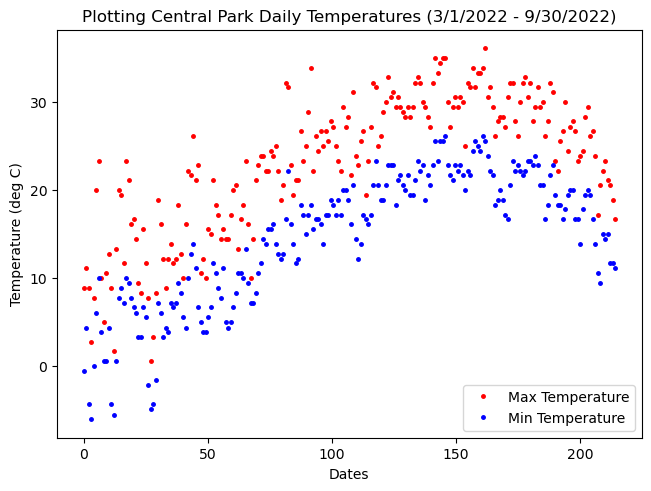

In [148]:

T_min_ctrl = central_park['TMIN']
x_min_ctrl = np.linspace(0.0, T_min_ctrl.shape[0], T_min_ctrl.shape[0])
T_max_ctrl = central_park['TMAX']
x_max_ctrl = np.linspace(0.0, T_max_ctrl.shape[0], T_max_ctrl.shape[0])

#plotting central park weather data
fig = plt.figure(constrained_layout = True)
ax = plt.gca()
ax.plot(x_max_ctrl, T_max_ctrl, 'ro', markersize=2.5, label='Max Temperature')  ##close to Central Park (uptown - Harlem)
ax.plot(x_min_ctrl, T_min_ctrl, 'bo', markersize=2.5, label='Min Temperature')  ##close to Central Park (uptown - Harlem)
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature (deg C)")
ax.set_title('Plotting Central Park Daily Temperatures (3/1/2022 - 9/30/2022)')
plt.legend(loc='lower right')
plt.show()


### Preliminary Analysis
Calculate min and max daily temperatures for WU stations

In [149]:
#calculating min and max temp per day from WU data

# weather_data_list[0]['Temperature']
# weather_data_list[0]['Date']
# weather_data_list[0].dtypes

#reference: https://github.com/arvindnswamy/IntroToPythonForMEstudents/blob/main/IntroductionToPython_PandasNumpyScipyMatplotlib.ipynb

wd_avgdailytemp_list = []
wd_mindailytemp_list = []
wd_maxdailytemp_list = []

for i in range(len(weather_data_list)):
    wd_dailytemp_avg = weather_data_list[i].groupby(by=['Date']).mean(['Temperature'])
    wd_dailytemp_min = weather_data_list[i].groupby(by=['Date']).min(['Temperature'])
    wd_dailytemp_max = weather_data_list[i].groupby(by=['Date']).max(['Temperature'])
    # print(wd_dailytemp_max['Temperature'])
    wd_dailytemp_avg['Temperature'][:] = (wd_dailytemp_avg['Temperature'][:] - 32.0 )*(5.0/9.0) 
    wd_dailytemp_min['Temperature'][:] = (wd_dailytemp_min['Temperature'][:] - 32.0 )*(5.0/9.0) 
    wd_dailytemp_max['Temperature'][:] = (wd_dailytemp_max['Temperature'][:] - 32.0)*(5.0/9.0)
    wd_dailytemp_max = wd_dailytemp_max.assign(DATE=wd_dailytemp_max.axes[0])
    # wd_dailytemp_max = wd_dailytemp_max.assign(MONTH=wd_dailytemp_max['DATE'].dt.month)
    wd_avgdailytemp_list.append(wd_dailytemp_avg)
    wd_mindailytemp_list.append(wd_dailytemp_min)
    wd_maxdailytemp_list.append(wd_dailytemp_max)

print(wd_maxdailytemp_list[0].info())
# print(wd_maxdailytemp_list[0]['Speed'])


<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 2022-03-01 to 2022-10-31
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     237 non-null    float64
 1   Dew Point       0 non-null      float64
 2   Humidity        237 non-null    float64
 3   Speed           237 non-null    float64
 4   Precip. Rate.   0 non-null      float64
 5   Precip. Accum.  0 non-null      float64
 6   UV              0 non-null      float64
 7   DATE            237 non-null    object 
dtypes: float64(7), object(1)
memory usage: 16.7+ KB
None


### Comparing Trends

Temperature difference between WU stations and Central Park

In [150]:
#calculating min and max temp per day from WU data

# weather_data_list[0]['Temperature']
# weather_data_list[0]['Date']
# weather_data_list[0].dtypes

#reference: https://github.com/arvindnswamy/IntroToPythonForMEstudents/blob/main/IntroductionToPython_PandasNumpyScipyMatplotlib.ipynb

wd_maxdailytemp_list = []

for i in range(len(weather_data_list)):
    wd_dailytemp_max = weather_data_list[i].groupby(by=['Date']).max(['Temperature'])
    wd_dailytemp_max['Temperature'][:] = (wd_dailytemp_max['Temperature'][:] - 32.0 )*(5.0/9.0)  #convert F to C
    wd_dailytemp_max['Speed'][:] = wd_dailytemp_max['Speed'][:]*0.44704  ## 1 mph = 0.44704 m/s
    wd_dailytemp_max = wd_dailytemp_max.assign(DATE=wd_dailytemp_max.axes[0])
    wd_dailytemp_max = wd_dailytemp_max.rename(columns={'Temperature': 'T_max'+wu_list[i], 'Humidity':'Rel_Humidity'+wu_list[i], 'Speed':'U_inf'+wu_list[i]})

    wd_maxdailytemp_list.append(wd_dailytemp_max)

print(wd_maxdailytemp_list[3].info())
print(wd_maxdailytemp_list[6].info())
# print(wd_maxdailytemp_list[6]['U_inf'+wu_list[6]])


<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 2022-05-12 to 2022-10-31
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   T_max1626         172 non-null    float64
 1   Rel_Humidity1626  172 non-null    float64
 2   U_inf1626         172 non-null    float64
 3   UV                172 non-null    float64
 4   High              0 non-null      float64
 5   Low               0 non-null      float64
 6   Average           0 non-null      float64
 7   DATE              172 non-null    object 
dtypes: float64(7), object(1)
memory usage: 12.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 2022-03-01 to 2022-08-15
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   T_max982         156 non-null    float64
 1   Rel_Humidity982  156 non-null    float64
 2   U_inf982         156 non-null    float64
 3   UV     

In [181]:
# evaporative heat transfer
# evap_dict = {'March':1.19E-08, 'April':2.50E-08, 'May':2.65E-08, 'June':1.98E-08, 'July':1.53E-08, 'August':1.18E-08, 'September':2.99E-08}
#define evaporation constant d based on monthly precipitation data
# evap_dict = {3 : 1.19E-08, 4 : 2.50E-08, 5 : 2.65E-08, 6 : 1.98E-08, 7 : 1.53E-08, 8 : 1.18E-08, 9 : 2.99E-08}
evap_list = [1.19E-08, 2.50E-08, 2.65E-08, 1.98E-08, 1.53E-08, 1.18E-08, 2.99E-08]

# q = 2256 kJ/kg * 1000 kg/m^3 * 1 m * 1 m * d
q_evap = lambda d: 2256.0*10**6*d
# q_evap = lambda d: 2256.0*1000*d
#d = meters of water evaporated per second

# def q_evap_d(month):
#     evap_d = evap_list[month-3]
#     q_evap_d = 2256.0*1000.0*evap_d
#     return q_evap_d


# q_evap_d = lambda d: 2256.0*1000.0*evap_dict[d]


In [182]:
#solar radiation
alpha_qs = 200.0
sigma = 5.67*10**-8
epsilon = .85
T_sky = 280
T_g_ref = 300 ##place holder
 
q_solar = alpha_qs - 4.0*sigma*epsilon*T_sky**3*(T_g_ref - T_sky)


In [183]:
#convective heat transfer
L = 80 
rho = 1.22
mu = 17.93*10**-6
k = .02557  ##assuming constant

Re_x = lambda u: rho * u * L / mu
Pr = .71

def q_conv(T_a, u, T_g=300.0):
    """q_conv = lambda T_g, T_a, h: h*(T_g - T_a)"""
    Nu_turb = .037*Re_x(u)**.8*Pr**(1/3)
    h_turb = Nu_turb * k / L
    q_conv = h_turb*(T_g - T_a)
    return q_conv

def ground_temp(T_a, u):
    """predicting ground temperature for non-vegetated areas"""
    # Nu = .0296*Re**.8*Pr**.33
    # Nu_turb = .037*Re_x(u_ref)**.8*Pr**(1/3)
    # Nu_lam = .664*Re_x(u_ref)**.5*Pr**(1/3)
    Nu_turb = .037*Re_x(u)**.8*Pr**(1/3)

    # Re_ref = 600000
    # u_ref = 5.0
    h_turb = Nu_turb * k / L
    T_g = (alpha_qs + h_turb*T_a + 4.0*sigma*epsilon*T_sky**4)/(h_turb + 4.0*sigma*epsilon*T_sky**3)
    return T_g

def ground_temp_ctrl(T_a, u, d):
    """predicting ground temperature for Central Park (includes evaporation)"""
    Nu_turb = .037*Re_x(u)**.8*Pr**(1/3)
    h_turb = Nu_turb * k / L
    T_g_ctrl = (alpha_qs + h_turb*T_a + 4.0*sigma*epsilon*T_sky**4 - q_evap(d))/(h_turb + 4.0*sigma*epsilon*T_sky**3)
    return T_g_ctrl

def predict_air_temp(T_g, q_conv, h):
    T_a = T_g - q_conv/h
    return T_a


In [184]:
#define new wu_list without stations 3 and 6

wu_list_n = ['1421', '1622', '1238', '1571', '1387']
wd_maxdailytemp_list_n = [wd_maxdailytemp_list[0], wd_maxdailytemp_list[1], wd_maxdailytemp_list[2], wd_maxdailytemp_list[4], wd_maxdailytemp_list[5]]

In [185]:

df_combo = pd.merge(wd_maxdailytemp_list[0], central_park, how='inner', on=['DATE'])
df_combo = df_combo.drop(['PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 
                          'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
                          'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'Dew Point'], axis=1)

df_combo = df_combo.rename(columns={'TMAX':'T_max_ctrl'})
df_combo = df_combo.assign(T_max_ctrl_Kelv=df_combo['T_max_ctrl']+273.15)

# for i in range(len(wu_list_n)):
df_combo = df_combo.assign(Tdif0=df_combo['T_max'+wu_list_n[0]]-df_combo['T_max_ctrl'])
df_combo = df_combo.rename(columns={'Tdif0':'T_dif'+wu_list[0]})
df_combo = df_combo.assign(T_Kelv=df_combo['T_max'+wu_list[0]]+273.15)  #Kelvin = 273.15 + deg C
df_combo = df_combo.rename(columns={'T_Kelv':'T_Kelv'+wu_list[0]})
df_combo = df_combo.assign(Re=Re_x(df_combo['U_inf'+wu_list[0]]))
df_combo = df_combo.rename(columns={'Re':'Re'+wu_list[0]})
df_combo = df_combo.assign(q_conv=q_conv(df_combo['T_Kelv'+wu_list[0]],df_combo['U_inf'+wu_list[0]]))
df_combo = df_combo.rename(columns={'q_conv':'q_conv'+wu_list[0]})
df_combo = df_combo.assign(T_ground=ground_temp(
    df_combo['T_Kelv'+wu_list[0]], df_combo['U_inf'+wu_list[0]]))
df_combo = df_combo.rename(columns={'T_ground': 'T_ground'+wu_list[0]})

for i in range(1, len(wd_maxdailytemp_list_n)):
    df_combo = pd.merge(df_combo, wd_maxdailytemp_list_n[i], how='inner', on=['DATE'])
    df_combo = df_combo.assign(Tdif=df_combo['T_max'+wu_list_n[i]]-df_combo['T_max_ctrl'])
    df_combo = df_combo.rename(columns={'Tdif':'T_dif'+wu_list_n[i]})
    df_combo = df_combo.assign(T_Kelv=df_combo['T_max'+wu_list_n[1]]+273.15)
    df_combo = df_combo.rename(columns={'T_Kelv':'T_Kelv'+wu_list_n[i]})
    df_combo = df_combo.assign(Re=Re_x(df_combo['U_inf'+wu_list_n[i]]))
    df_combo = df_combo.rename(columns={'Re':'Re'+wu_list_n[i]})
    df_combo = df_combo.assign(q_conv=q_conv(df_combo['T_Kelv'+wu_list_n[i]],df_combo['U_inf'+wu_list_n[i]]))
    df_combo = df_combo.rename(columns={'q_conv':'q_conv'+wu_list_n[i]})
    df_combo = df_combo.assign(T_ground=ground_temp(df_combo['T_Kelv'+wu_list_n[i]], df_combo['U_inf'+wu_list_n[i]]))
    df_combo = df_combo.rename(columns={'T_ground': 'T_ground'+wu_list_n[i]})


df_combo = df_combo.drop(['Precip. Rate.', 'Precip. Accum.'], axis=1)
df_combo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   T_max1421         200 non-null    float64
 1   Rel_Humidity1421  200 non-null    float64
 2   U_inf1421         200 non-null    float64
 3   UV_x              0 non-null      float64
 4   DATE              200 non-null    object 
 5   LATITUDE          200 non-null    float64
 6   LONGITUDE         200 non-null    float64
 7   ELEVATION         200 non-null    float64
 8   AWND              200 non-null    float64
 9   AWND_ATTRIBUTES   200 non-null    object 
 10  PRCP              200 non-null    float64
 11  T_max_ctrl        200 non-null    float64
 12  TMIN              200 non-null    float64
 13  T_max_ctrl_Kelv   200 non-null    float64
 14  T_dif1421         200 non-null    float64
 15  T_Kelv1421        200 non-null    float64
 16  Re1421            200 non-null    float64
 1

c:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UV_x'} in the result is deprecated and will raise a MergeError in a future version.


In [186]:
#format the dates as datetime object to enable correct plotting

from datetime import datetime

df_combo['DATE'] = df_combo['DATE'].replace(to_replace='', value=np.nan)
df_combo['DATE'] = df_combo['DATE'].dropna()
df_combo['DATE'] = df_combo['DATE'].astype(str)
df_combo['DATE'] = df_combo['DATE'].str.strip(" ,''")
df_combo['DATE'] = pd.to_datetime(df_combo['DATE'], utc=True)
df_combo = df_combo.assign(MONTH=df_combo['DATE'].dt.month)
df_combo = df_combo.assign(evap_d=df_combo['MONTH'])
# df_combo['AWND'][:] = df_combo['AWND'][:]*0.44704  ## 1 mph = 0.44704 m/s
# df_combo['c1'].loc[df['c1'] == 'Value'] = 10
df_combo['evap_d'] = df_combo['evap_d'].loc[df_combo['evap_d'] == '3'] = 1.19E-08
df_combo['evap_d'] = df_combo['evap_d'].loc[df_combo['evap_d'] == '4'] = 2.50E-08
df_combo['evap_d'] = df_combo['evap_d'].loc[df_combo['evap_d'] == '5'] = 2.65E-08
df_combo['evap_d'] = df_combo['evap_d'].loc[df_combo['evap_d'] == '6'] = 1.98E-08
df_combo['evap_d'] = df_combo['evap_d'].loc[df_combo['evap_d'] == '7'] = 1.53E-08
df_combo['evap_d'] = df_combo['evap_d'].loc[df_combo['evap_d'] == '8'] = 1.18E-08
df_combo['evap_d'] = df_combo['evap_d'].loc[df_combo['evap_d'] == '9'] = 2.99E-08
df_combo = df_combo.assign(q_evap_ctrl=q_evap(df_combo['evap_d']))
df_combo = df_combo.assign(T_ground_ctrl=ground_temp_ctrl(df_combo['T_max_ctrl_Kelv'], df_combo['AWND'],df_combo['evap_d']))
df_combo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   T_max1421         200 non-null    float64            
 1   Rel_Humidity1421  200 non-null    float64            
 2   U_inf1421         200 non-null    float64            
 3   UV_x              0 non-null      float64            
 4   DATE              200 non-null    datetime64[ns, UTC]
 5   LATITUDE          200 non-null    float64            
 6   LONGITUDE         200 non-null    float64            
 7   ELEVATION         200 non-null    float64            
 8   AWND              200 non-null    float64            
 9   AWND_ATTRIBUTES   200 non-null    object             
 10  PRCP              200 non-null    float64            
 11  T_max_ctrl        200 non-null    float64            
 12  TMIN              200 non-null    float64            
 13  T_max

c:\Users\sophi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [179]:
# df_combo['MONTH'][195]
# evap_dict[9]
# df_combo = df_combo.assign(q_evap_ctrl=q_evap(evap_dict[df_combo['MONTH'][0]]))
# q_evap(evap_dict[df_combo['MONTH'][:]])
# df_combo['MONTH'].astype(int)

df_combo['U_inf'+wu_list[0]]
# evap_dict[df_combo['MONTH']]

0      3.442208
1      2.995168
2      6.303264
3      3.308096
4      4.470400
         ...   
195    1.832864
196    4.783328
197    2.816352
198    3.531616
199    1.207008
Name: U_inf1421, Length: 200, dtype: float64

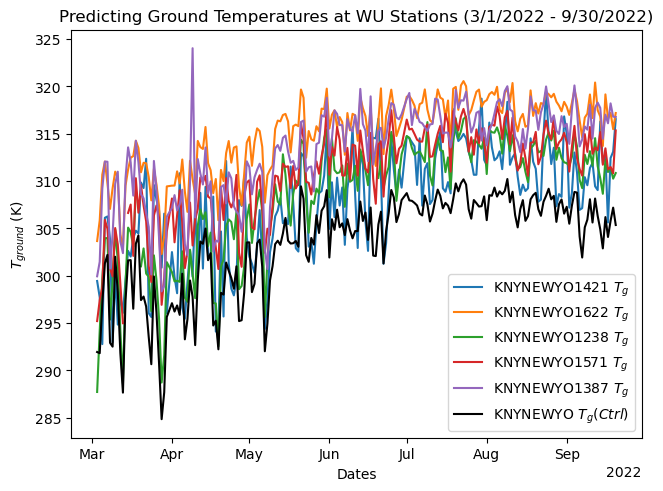

In [187]:
# df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

#plotting central park weather data
fig = plt.figure(constrained_layout=True)
# fig = plt.figure(constrained_layout=True, figsize=(20,10))
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# for i in range(len(wu_list)-1):
#     ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_ground'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_g$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_ground'+wu_list[1]], markersize=2.5, label=r'KNYNEWYO'+wu_list[1]+' $T_g$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_ground'+wu_list[2]], markersize=2.5, label=r'KNYNEWYO'+wu_list[2]+' $T_g$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_ground'+wu_list[4]], markersize=2.5, label=r'KNYNEWYO'+wu_list[4]+' $T_g$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_ground'+wu_list[5]], markersize=2.5, label=r'KNYNEWYO'+wu_list[5]+' $T_g$')  # close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_ground_ctrl'], '-k', markersize=2.5, label=r'KNYNEWYO $T_g (Ctrl)$')  # close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['T_ground_ctrl'], 'o', markersize=10.5, label=r'KNYNEWYO $T_g (Ctrl)$')  # close to Central Park (uptown - Harlem))
    
ax.set_xlabel("Dates")
ax.set_ylabel(r"$T_{ground}$ (K)")
ax.set_title('Predicting Ground Temperatures at WU Stations (3/1/2022 - 9/30/2022)')
plt.legend(loc='lower right')
plt.show()


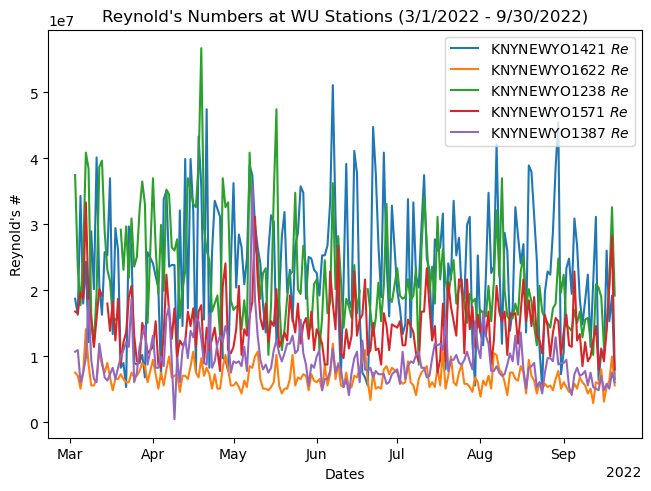

In [23]:
# df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

#plotting central park weather data
fig = plt.figure(constrained_layout=True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# for i in range(len(wu_list)-1):
#     ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Re'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $Re$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Re'+wu_list[1]], markersize=2.5, label=r'KNYNEWYO'+wu_list[1]+' $Re$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Re'+wu_list[2]], markersize=2.5, label=r'KNYNEWYO'+wu_list[2]+' $Re$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Re'+wu_list[4]], markersize=2.5, label=r'KNYNEWYO'+wu_list[4]+' $Re$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Re'+wu_list[5]], markersize=2.5, label=r'KNYNEWYO'+wu_list[5]+' $Re$')  # close to Central Park (uptown - Harlem))
    
ax.set_xlabel("Dates")
ax.set_ylabel("Reynold's #")
ax.set_title("Reynold's Numbers at WU Stations (3/1/2022 - 9/30/2022)")
plt.legend(loc='upper right')
plt.show()


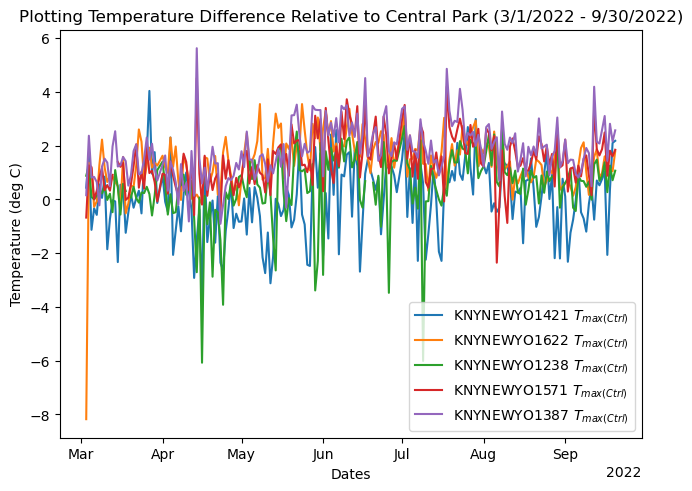

In [55]:
# df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

#plotting central park weather data
fig = plt.figure(constrained_layout=True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# for i in range(len(wu_list)-1):
#     ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max (Ctrl)}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[1]], markersize=2.5, label=r'KNYNEWYO'+wu_list[1]+' $T_{max (Ctrl)}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[2]], markersize=2.5, label=r'KNYNEWYO'+wu_list[2]+' $T_{max (Ctrl)}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[4]], markersize=2.5, label=r'KNYNEWYO'+wu_list[4]+' $T_{max (Ctrl)}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[5]], markersize=2.5, label=r'KNYNEWYO'+wu_list[5]+' $T_{max (Ctrl)}$')  # close to Central Park (uptown - Harlem))
    
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature (deg C)")
ax.set_title('Plotting Temperature Difference Relative to Central Park (3/1/2022 - 9/30/2022)')
plt.legend(loc='lower right')
plt.show()


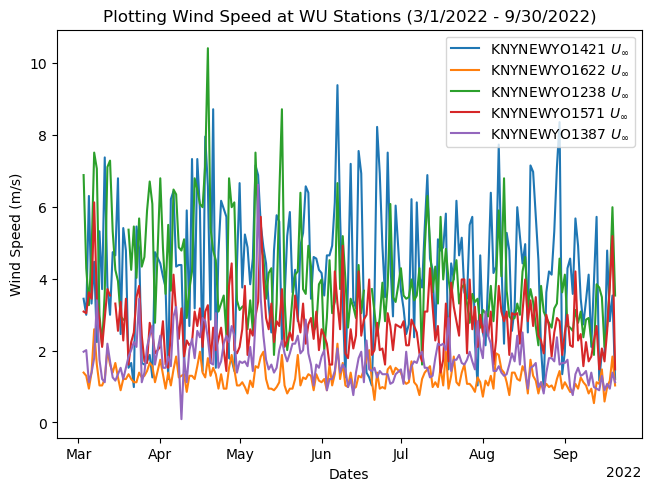

In [50]:
# df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

#plotting central park weather data
fig = plt.figure(constrained_layout=True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# for i in range(len(wu_list)-1):
#     ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['U_inf'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $U_{\infty}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['U_inf'+wu_list[1]], markersize=2.5, label=r'KNYNEWYO'+wu_list[1]+' $U_{\infty}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['U_inf'+wu_list[2]], markersize=2.5, label=r'KNYNEWYO'+wu_list[2]+' $U_{\infty}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['U_inf'+wu_list[4]], markersize=2.5, label=r'KNYNEWYO'+wu_list[4]+' $U_{\infty}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['U_inf'+wu_list[5]], markersize=2.5,
        label=r'KNYNEWYO'+wu_list[5]+' $U_{\infty}$')  # close to Central Park (uptown - Harlem))
    
ax.set_xlabel("Dates")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title('Plotting Wind Speed at WU Stations (3/1/2022 - 9/30/2022)')
plt.legend(loc='upper right')
plt.show()


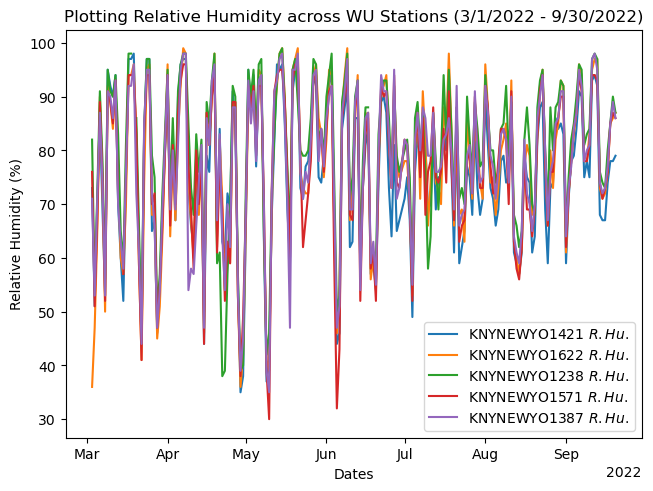

In [51]:
# df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

#plotting central park weather data
fig = plt.figure(constrained_layout=True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# for i in range(len(wu_list)-1):
#     ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Rel_Humidity'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $R. Hu.$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Rel_Humidity'+wu_list[1]], markersize=2.5, label=r'KNYNEWYO'+wu_list[1]+' $R. Hu.$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Rel_Humidity'+wu_list[2]], markersize=2.5, label=r'KNYNEWYO'+wu_list[2]+' $R. Hu.$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Rel_Humidity'+wu_list[4]], markersize=2.5, label=r'KNYNEWYO'+wu_list[4]+' $R. Hu.$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['Rel_Humidity'+wu_list[5]], markersize=2.5,
        label=r'KNYNEWYO'+wu_list[5]+' $R. Hu.$')  # close to Central Park (uptown - Harlem))
    
ax.set_xlabel("Dates")
ax.set_ylabel("Relative Humidity (%)")
ax.set_title('Plotting Relative Humidity across WU Stations (3/1/2022 - 9/30/2022)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#first approximation: assume no evaporation and forced convection -> q_solar = q_conv



In [19]:
# # df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

# #plotting central park weather data
# fig = plt.figure(constrained_layout=True)
# ax = plt.gca()
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)
# # ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# # for i in range(len(wu_list)-1):
# #     ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['T_Kelv'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['T_Kelv'+wu_list[1]], markersize=2.5, label=r'KNYNEWYO'+wu_list[1]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['T_Kelv'+wu_list[2]], markersize=2.5, label=r'KNYNEWYO'+wu_list[2]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['T_Kelv'+wu_list[4]], markersize=2.5, label=r'KNYNEWYO'+wu_list[4]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['T_Kelv'+wu_list[5]], markersize=2.5, label=r'KNYNEWYO'+wu_list[5]+' $T_{max}$')  # close to Central Park (uptown - Harlem))
    
# ax.set_xlabel("Dates")
# ax.set_ylabel("Temperature (K)")
# ax.set_title('Plotting Temperatures at WU Stations (3/1/2022 - 9/30/2022)')
# plt.legend(loc='lower right')
# plt.show()


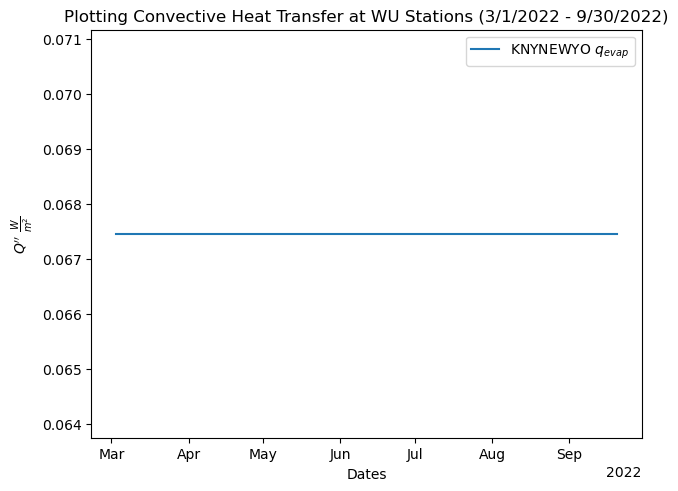

In [174]:
# df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

#plotting central park weather data
fig = plt.figure(constrained_layout=True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
# for i in range(len(wu_list)-1):
#     ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
ax.plot(df_combo['DATE'], df_combo['q_evap_ctrl'], markersize=2.5, label=r'KNYNEWYO $q_{evap}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['q_conv'+wu_list[1]], markersize=2.5, label=r'KNYNEWYO'+wu_list[1]+' $q_{conv}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['q_conv'+wu_list[2]], markersize=2.5, label=r'KNYNEWYO'+wu_list[2]+' $q_{conv}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['q_conv'+wu_list[4]], markersize=2.5, label=r'KNYNEWYO'+wu_list[4]+' $q_{conv}$')  ##close to Central Park (uptown - Harlem))
# ax.plot(df_combo['DATE'], df_combo['q_conv'+wu_list[5]], markersize=2.5, label=r'KNYNEWYO'+wu_list[5]+' $q_{conv}$')  # close to Central Park (uptown - Harlem))
    
ax.set_xlabel("Dates")
ax.set_ylabel(r"$Q''$ $\frac{W}{m^2}$")
ax.set_title('Plotting Convective Heat Transfer at WU Stations (3/1/2022 - 9/30/2022)')
plt.legend(loc='upper right')
plt.show()
